In [228]:
from math import *
import matplotlib.pyplot as plt

In [229]:
def find_seed(g, c= 0, eps= 2**(-26)):
    """
    dichotomie de g(t) de une variable pour trouver c
    """
    a,b = 0,1
    if (g(a)-c)*((g(b)-c))>0 :
        return None
    while (b-a)>= eps:
        m = (a+b)/2
        if (g(a)-c)*((g(m)-c))>0:
            a = m
        else:
            b = m
    return m

In [230]:
def point_suivant(f,s,c,theta_prec, delta = 0.01, precision = 100):
    """
    trouve le point suivant sur la ligne de niveau en cherchant à une distance delta la 
    direction dans laquelle la fonction reste au même niveau.
    theta_prec correspond à la direction dans laquelle allait la ligne de niveau
    à l'itération précédente
    """
    xs, ys = s
    def g(t):
        return f(xs + cos(t)*delta, ys + sin(t)*delta)
    theta = theta_prec + (pi/2)
    for i in range (precision):
        g_prec = g(theta)
        theta = theta_prec + (pi/2) * (1 - i/precision) + (-3*pi/2) * (i/precision)
        if (g_prec-c)*(g(theta)-c)<0: #abs(g(theta)- c) < delta/100 or 
            nxs, nys =  xs + cos(theta)*delta, ys + sin(theta)*delta
            return nxs, nys ,theta            
    return -1,-1,0

In [231]:
def simple_contour(f,c=0.0,delta=0.01):
    """
    cherche un fragment de ligne de niveau depuis les bords de [0,1]²
    """
    def g(t):
        return f(0,t)
    t = find_seed(g,c)
    if t != None:
        s_arr,s_av = (0,t),(0,t)
        x_arr,x_av = [0],[0]
        y_arr,y_av = [t],[t]     
    else: #si on ne trouve pas de point de la ligne de niveau sur le bord de gauche, on cherche sur le bord du bas
        def g(t):
            return f(t,0)
        t = find_seed(g,c)
        if t != None:
            s_arr,s_av = (t,0),(t,0)
            x_arr,x_av = [t],[t]
            y_arr,y_av = [0],[0]
        else: #sinon on estime qu'aucune ligne de niveau ne passe dans [0,1]² (faute éventuelle de précision de la grille)
            return [],[]    
    nb_iter = int(1//delta) #on estime que le morceau de ligne de niveau dans [0,1]² ne mesure pas plus de 2 unités
    theta_prec = 0 #on part vers l'arrière puis on recommencera vers l'avant pour éviter les trous
    for i in range(nb_iter): 
        nxs, nys, theta_prec = point_suivant(f,s_arr,c,theta_prec,delta)
        if (nxs,nys) == (-1,-1): #dans le cas d'un point sommet il peut ne pas y avoir de point suivant
            break
        x_arr.append(nxs)
        y_arr.append(nys)
        s_arr = (nxs, nys)
    theta_prec = pi #on part vers l'avant
    for i in range(nb_iter): 
        nxs, nys, theta_prec = point_suivant(f,s_av,c,theta_prec,delta)
        if (nxs,nys) == (-1,-1): #dans le cas d'un point sommet il peut ne pas y avoir de point suivant
            break
        x_av.append(nxs)
        y_av.append(nys)
        s_av = (nxs, nys)
    x_av.reverse()  
    x_av.pop()
    x = x_av + x_arr  #on fusionne les listes vers l'avant et l'arrière pour obtenir un segment continu
    y_av.reverse()
    y_av.pop()
    y = y_av + y_arr
    return x, y

In [232]:
def convert_back(x, y, xa, xb, ya, yb):
    """
    reconvertit les points entre 0 et 1 vers leurs valeurs dans la cellule
    """
    nx, ny = [],[]
    for i in range(len(x)):
        nx.append(xa*(1-x[i]) + xb*x[i])
        ny.append(ya*(1-y[i]) + yb*y[i])
    return nx,ny

In [233]:
def contour (f, c = 0.0, xc = [0.0,1.0], yc = [0.0,1.0], delta = 0.01):
    """
    cherche les fragments cellule par cellule selon la grille définie par l'utilisateur
    """
    xs, ys = [],[]
    for i in range(len(xc)-1):
        for j in range(len(yc)-1):
            def fcell(x,y):
                return f(xc[i]*(1-x) + xc[i+1]*x, yc[j]*(1-y) + yc[j+1]*y)
            x, y = simple_contour(fcell, c, delta)
            nx, ny = convert_back (x, y, xc[i], xc[i+1], yc[j], yc[j+1])
            xs.append(nx)
            ys.append(ny)
    return xs, ys

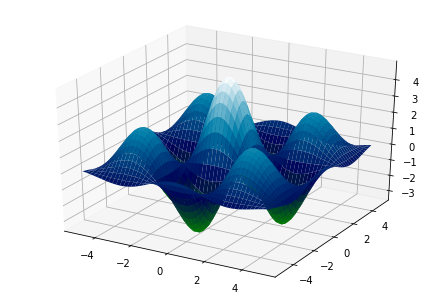

In [234]:
from math import *
from mpl_toolkits.mplot3d import Axes3D

sin = np.vectorize(sin)
cos = np.vectorize(cos)
exp = np.vectorize(exp)

def f(x,y):
    return 5*cos(x)*cos(y)*exp(-0.04*(x**2+y**2))

x = np.linspace(-5,5)
y = np.linspace(-5,5)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap ='ocean')

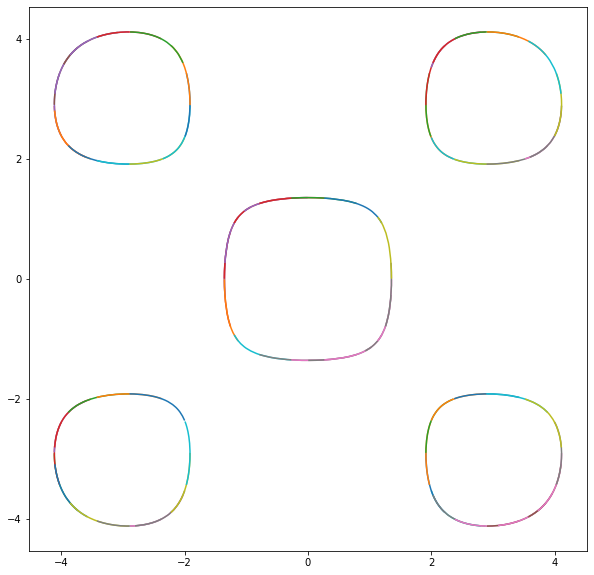

In [235]:
grille_x = np.linspace(-5,5,20)
grille_y = np.linspace(-5,5,20)

xs ,ys = contour(f, 1,grille_x,grille_y,0.01)

plt.figure(figsize = (10,10))

for x, y in zip(xs, ys):
    plt.plot(x, y)
    
plt.show()

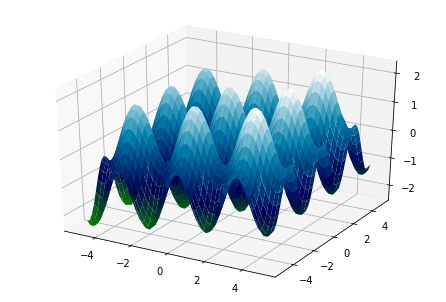

In [246]:
from math import *
from mpl_toolkits.mplot3d import Axes3D

sin = np.vectorize(sin)
cos = np.vectorize(cos)
exp = np.vectorize(exp)

def f(x,y):
    return cos(2*x)+cos(2*y)+0.1*x

x = np.linspace(-5,5)
y = np.linspace(-5,5)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap ='ocean')

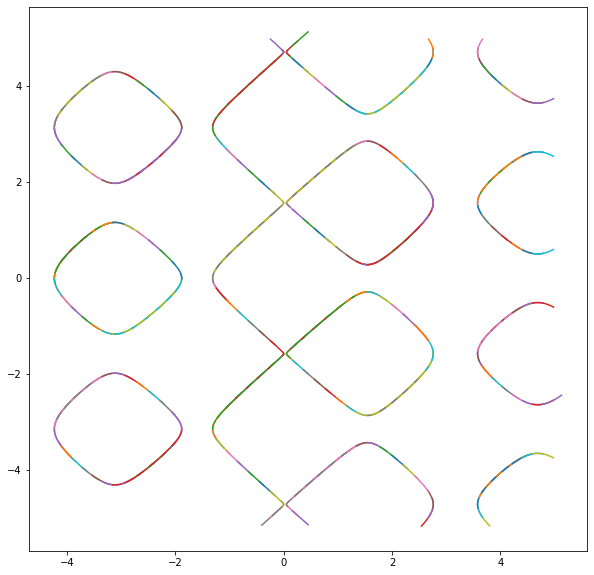

In [248]:
grille_x = np.linspace(-5,5)
grille_y = np.linspace(-5,5)

xs ,ys = contour(f, 0,grille_x,grille_y,0.01)

plt.figure(figsize = (10,10))

for x, y in zip(xs, ys):
    plt.plot(x, y)
    
plt.show()